# naive bayes

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


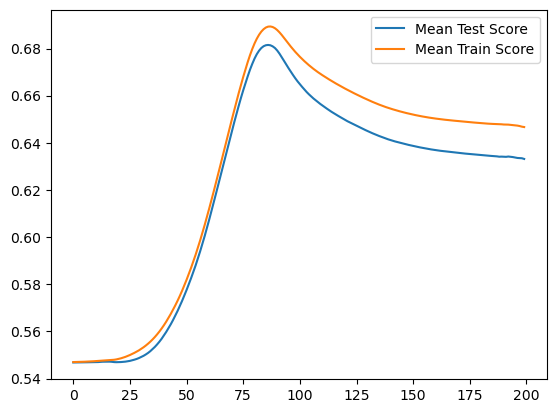

GaussianNB(var_smoothing=6.517339604882433e-06)
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     23986
           1       0.22      0.14      0.17      3955
           2       0.04      0.33      0.07       309

    accuracy                           0.73     28250
   macro avg       0.37      0.43      0.36     28250
weighted avg       0.77      0.73      0.74     28250

Accuracy: 0.7264424778761062


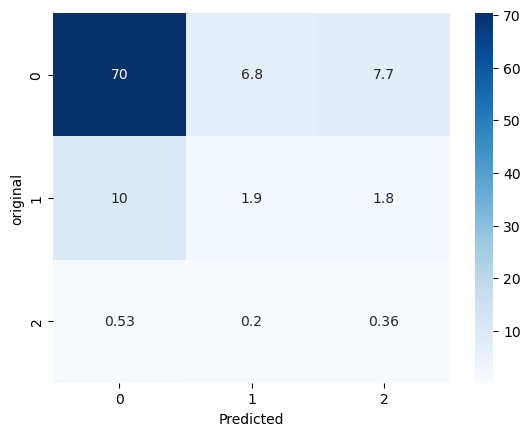

In [12]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0)



# Define the gaussian model
model = GaussianNB()

# Define the parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-12, num=200)
}

# # Create the PCA object
# pca = PCA()

# # Fit the PCA object on the training data
# pca.fit(X_train)

# # Transform the training and cross validation data using PCA
# X_train_pca = pca.transform(X_train)
# X_cv_pca = pca.transform(X_cv)

# scores=["accuracy","precision_macro","recall_macro","f1_macro"]

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid,scoring="roc_auc_ovo_weighted",verbose=1,return_train_score=True,refit=True)

# Fit the GridSearchCV object on the cross validation data
grid_search.fit(X_cv, y_cv)

plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.legend()
plt.show()

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(best_model)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# # Transform the testing data using PCA
# X_test_pca = pca.transform(X_test)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# #create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Define a range of k values to try
k_values = range(2, 31)

# Create an empty list to store the silhouette scores for each k value
silhouette_scores = []

# Loop over the k values
for k in k_values:
    print("k is",k)
    # Create a kNN model with the current k value
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the data
    model.fit(X, y)
    
    # Make predictions on the data
    y_pred = model.predict(X)
    
    # Calculate the silhouette score for the current k value
    score = silhouette_score(X, y_pred)
    
    # Append the score to the list of silhouette scores
    silhouette_scores.append(score)

# Plot the silhouette scores for each k value
plt.plot(k_values, silhouette_scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal k value (the one with the highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal value of k is: {optimal_k}')


k is 2


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k is 3


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KeyboardInterrupt: 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


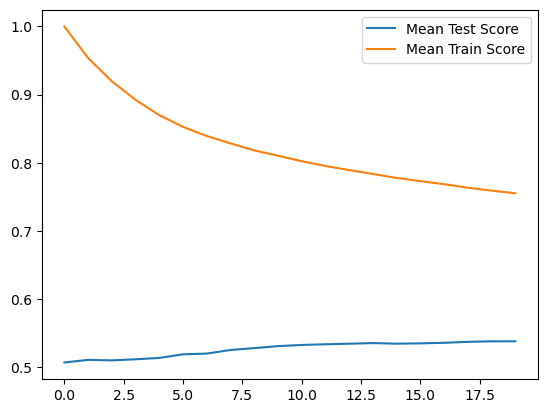

KNeighborsClassifier(n_neighbors=19)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-d

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     23986
           1       0.00      0.00      0.00      3955
           2       0.00      0.00      0.00       309

    accuracy                           0.85     28250
   macro avg       0.28      0.33      0.31     28250
weighted avg       0.72      0.85      0.78     28250

Accuracy: 0.8485663716814159


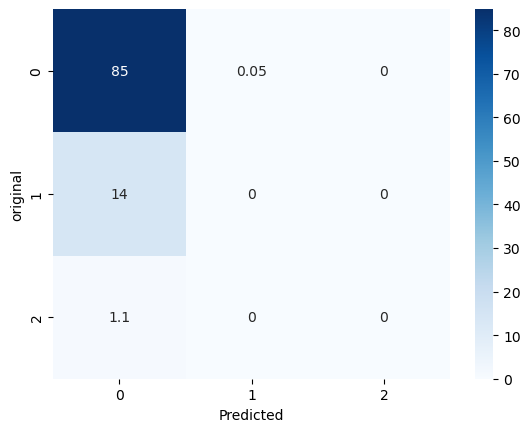

In [13]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier instead of GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load the dataset
df= pd.read_csv('clean_2014.csv',index_col=0)

# Split the data into features and target
X = df.drop(['accident_severity_encoding','accident_index'], axis=1)
y = df['accident_severity_encoding']

# Split the data into training, cross validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Define the kNN model
model = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid,scoring="roc_auc_ovo_weighted",verbose=1,return_train_score=True,refit=True)

# Fit the GridSearchCV object on the cross validation data
grid_search.fit(X_cv, y_cv)

plt.plot(grid_search.cv_results_['mean_test_score'], label='Mean Test Score')
plt.plot(grid_search.cv_results_['mean_train_score'], label='Mean Train Score')
plt.legend()
plt.show()

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(best_model)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

result = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test,y_pred,normalize='all')
sns.heatmap(cm*100,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('original')
plt.show()
